In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline

os.chdir(r"/Users/Hongwei/Desktop")
mnist_data = pd.read_csv("mnist_train.csv")

In [3]:
# have a general view of the MNIST dataset
mnist_data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Create new and easily recognized column name
new_column_name = ['label']
for num in range(mnist_data.shape[1]-1):
    tem = 'pixel' + str(num)
    new_column_name.append(tem)

mnist_data.columns = new_column_name

In [5]:
# Check the new column name
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


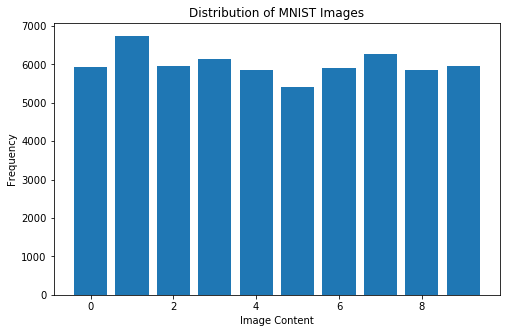

In [3]:
# The general view of the 0-9 numbers distribution
from collections import defaultdict
num_stats = defaultdict(int)

for num in mnist_data['label']:
    num_stats[num] += 1

x = sorted(num_stats)
y = [num_stats[num] for num in x]

plt.figure(figsize=(8,5))
plt.bar(x, height=y)
plt.xlabel("Image Content")
plt.ylabel("Frequency")
plt.title("Distribution of MNIST Images")

In [8]:
# Check the shape of the dataset
print mnist_data.shape

(59999, 785)


In [9]:
# Check if NaN values existing
mnist_data.dropna().shape

(59999, 785)

In [5]:
# get rid of unnecessary variables and make independent and dependent variable for later dataset split
result = mnist_data["label"]  # dependent variable
predictors = mnist_data.drop(["label"], axis = 1) #independent variable

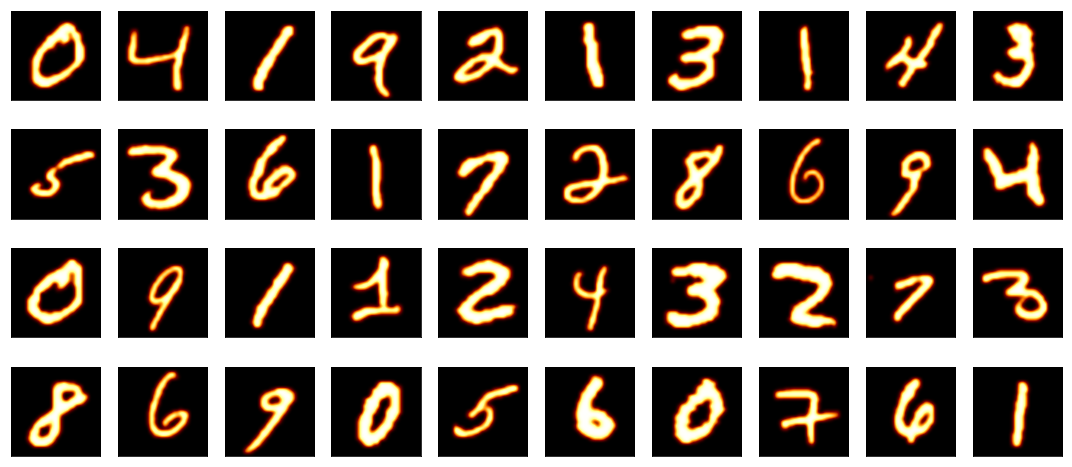

In [5]:
# plot some of the MNIST numbers
plt.figure(figsize=(15,15))
# plot 40 pictures
for i in range(0,40):
    plt.subplot(9,10,i + 1)
    # reshape from 1d to 2d pixel array
    grid_data = predictors.iloc[i].as_matrix().reshape(28,28)
    plt.imshow(grid_data, interpolation = "bicubic", cmap = "afmhot")
    # hide x, y axes
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [6]:
# Get the matrix of training data
X = predictors.values

In [7]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



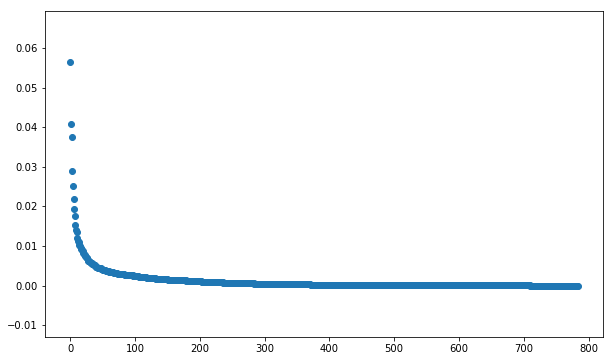

In [12]:
# Determine explained variance of each variables
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_)
plt.title("Single Variable's Exlained Variance")

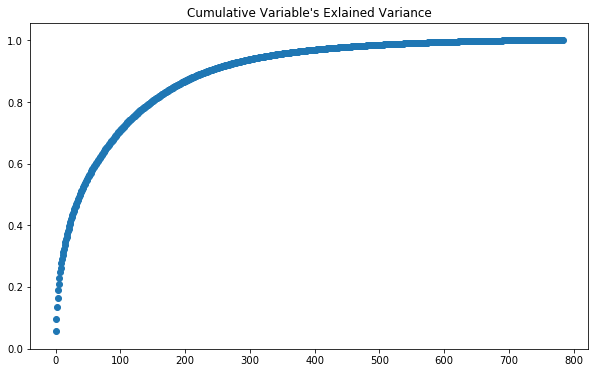

In [13]:
# Determine explained variance of cumulative variables
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_.cumsum())
plt.title("Cumulative Variable's Exlained Variance")

In [8]:
# Get top 40 PCA components
from sklearn.decomposition import PCA
n_components = 40
pca = PCA(n_components=40).fit(X_std)
pca.explained_variance_ratio_

array([ 0.05646761,  0.04078298,  0.03739414,  0.02885052,  0.02521136,
        0.02194323,  0.0192337 ,  0.01745816,  0.01535114,  0.01401742,
        0.01341763,  0.01203764,  0.01114598,  0.01089833,  0.0102864 ,
        0.00994499,  0.00936283,  0.00920992,  0.00893469,  0.00869884,
        0.00827323,  0.00803409,  0.00764842,  0.00741741,  0.0071523 ,
        0.00691705,  0.00683953,  0.00656428,  0.00631497,  0.00612602,
        0.00596094,  0.00587336,  0.00570654,  0.00560484,  0.00554403,
        0.00537131,  0.00529565,  0.00517346,  0.00506661,  0.00470709])

In [7]:
# Transform to images
eigen_40 = pca.components_.reshape(n_components,28, 28)

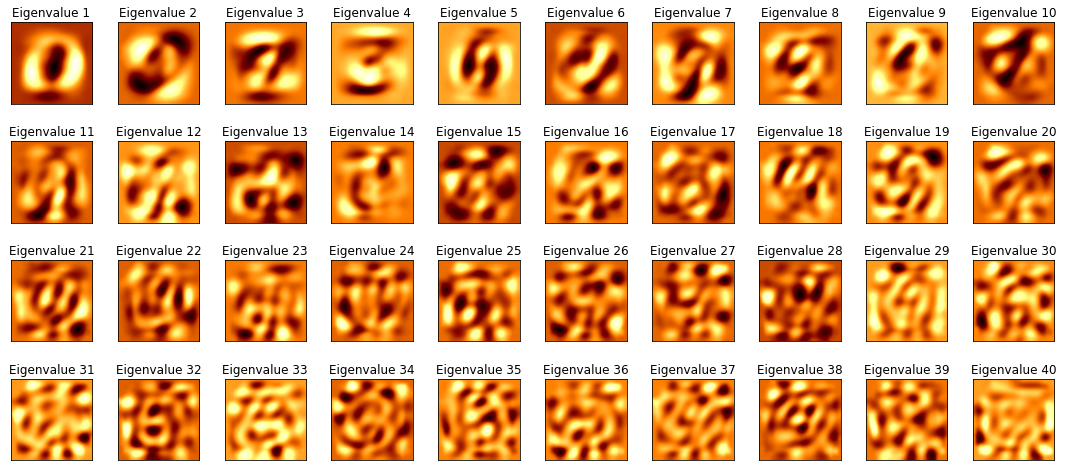

In [19]:
# Plot the first 40 eignenvalues
plt.figure(figsize=(15,15))
for i in list(range(40)):
    plt.subplot(9, 10, i + 1)
    plt.imshow(eigen_40[i], interpolation = "bicubic", cmap = "afmhot")
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=12)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()

In [9]:
# Randomly pick 2000 rows
data_sample = mnist_data.sample(2000)

data_y = data_sample["label"]  # dependent variable
data_x = data_sample.drop(["label"], axis = 1) #independent variable

# PCA

In [11]:
# Standardising the values
pca_std = StandardScaler().fit_transform(data_x.values)

# Call the PCA method with 2 components. 
pca = PCA(n_components=2)
x_2 = pca.fit(pca_std).transform(pca_std)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [13]:
# Use Plotly to plot PCA
data = [go.Scatter(
    x = x_2[:,0],
    y = x_2[:,1],
    mode = 'markers',
    showlegend = False,
    marker = dict(
        size = 8,
        color = data_y,
        colorscale ='Rainbow',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='PCA_plot')

# KMeans (Assume the MNIST data doesn't have labels)

In [12]:
from sklearn.cluster import KMeans
# Set a KMeans clustering with 9 components cuz there are 9 class labels
kmeans = KMeans(n_clusters=9)
# Compute cluster centers and predict cluster indices
kmeans_9 = kmeans.fit_predict(x_2)

data = [
    go.Scatter(
        x= x_2[:, 0], 
        y= x_2[:, 1], 
        mode="markers",
        showlegend=False,
        marker=dict(
            size=8,
            color = kmeans_9,
            colorscale = 'Rainbow',
            showscale=False, 
            line = dict(
                width = 2,
                color = 'rgb(255, 255, 255)'
            )))]

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = dict(data = data, layout = layout)
py.iplot(fig, filename="kmeans_plot")

## LDA

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

x_lda = lda.fit_transform(data_x, data_y)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning:

Variables are collinear.



In [16]:
# Plot LDA graph
data = [
    go.Scatter(
    x = x_lda[:,0],
    y = x_lda[:,1],
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = data_y,
        colorscale ='Rainbow',
        showscale = False,
        opacity = 0.8,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
    )
)]

layout = go.Layout(
    title= 'Linear Discriminant Analysis (LDA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Linear Discriminant',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Linear Discriminant',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='lda_plot')

## TSNE

In [17]:
from sklearn.manifold import TSNE
# Invoking the t-SNE method
tsne = TSNE()
x_tsne = tsne.fit_transform(data_x) 

In [18]:
# Plot TSNE graph
data = [
    go.Scatter(
    x = x_tsne[:,0],
    y = x_tsne[:,1],
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = data_y,
        colorscale ='Rainbow',
        showscale = False,
        opacity = 0.8,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
    )
)]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='TSNE_plot')